In [1]:
import numpy as np

# Optimazing a function

By Juan Pablo Ortega, Santiago Ferreira and Miguel Angel Granados

In [19]:
P_min = -3
P_max = 3
#num_of_bits = np.floor(np.log2(P_max-P_min)) + 1
num_of_bits = 8
crm_len = 2*int(num_of_bits)
num_of_crm = 20
p_cross = 0.9
p_mutation = 0.04
#epsilon = 0.0001
max_gen = 1000

## Functions

In [3]:
def decode(chromosome):
    '''
    Input: A chromosome encoding two binary numbers.
    Output: The two numbers in decimal base
    Time Complexity: O(num_of_bits)
    '''
    str_crm = str(chromosome)
    str_crm = str_crm.replace(' ','').replace('[','').replace(']','').replace(',','')
    str_x = str_crm[0:int(crm_len/2)]
    str_y = str_crm[int(crm_len/2):]
    x = int(str_x,2)  
    y = int(str_y,2)  
    '''
    Changing from binary to decimales takes O(k),
    where k is a count of the number of digits in 
    the binary representation of x. Thus, in our case,
    this is O(num_of_bits).
    '''
    x = (P_max-P_min)/(2**num_of_bits - 1) * x + P_min
    y = (P_max-P_min)/(2**num_of_bits - 1) * y + P_min
    return x,y

In [4]:
#Calculate object function
def f_coded(chromosome):
    '''
    As this function calls decode and then performs
    a simple calculation, its time complexity is
    O(num_of_bits).
    '''
    x,y = decode(chromosome)
    #print(x,y)
    f = 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)
    return f+8
def f_normal(vars):
    x,y = vars
    f = 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)
    return f+8

In [5]:
#Generates the first generation
def init_population():
        '''
        np.random.randint uses Mersenne Twister PRNG
        to generate random numbers, whose complexity
        to generate N random numbers is O(N). Therefore,
        init_population's time complexity is
        O(num_of_crm*crm_len). Source:
        https://eli.thegreenplace.net/2018/slow-and-fast-methods-for-generating-random-integers-in-python/
        '''
        ind = np.random.randint(0, high=2, size=(num_of_crm,crm_len), dtype='l')
        return list(ind) 
i = init_population()
i

[array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
 array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]),
 array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]),
 array([0, 1, 

In [6]:
#Returns the fitness of the entire population
def fitness_of_population(ind):
    '''
    .append() has O(1) time complexity
    and f_coded las O(num_of_bits),
    so fitness_of_population's complexity is
    O(len(ind)*num_of_bits) = O(num_of_crm*num_of_bits)
    '''
    fitness = []
    for i in np.arange(0,len(ind)):
        fitness.append(f_coded(ind[i]))
    #print(fitness_of_population)
    return fitness

In [7]:
#Selects 2 individuals from the population, the probability of beeing selected wil depend on
#fitnnes
def roulette(ind):
    '''
    Let's add the complexity of the function involved:
    1. fitness_of_pop      -> O(num_of_crm*num_of_bits)
    2. sum(fitness_of_pop) -> O(num_of_crm)
    3. selected_idx        -> O(1)
    4. append              -> O(1)
    Therefore, in total, roulette's time complexity is
    O(num_of_crm*num_of_bits + num_of_crm) = O(num_of_crm*num_of_bits)
    '''
    selected = []
    fitness_of_pop = fitness_of_population(ind)
    probs = fitness_of_pop/sum(fitness_of_pop)
    #print(probs)
    selected_idx = list(np.random.choice(np.arange(0,len(ind)),size=2,replace=True,p=probs))
    #print(probs[selected_idx[0]],probs[selected_idx[1]])
    selected.append(ind[selected_idx[0]])
    selected.append(ind[selected_idx[1]])
    return selected

In [8]:
#Crosses the poulation to create the new generation, but the elite of the previous genration
#get to be added to the next first
def cross(ind):
    '''
    As this function performs a loop of
    size num_of_crm in which it calls the fuction
    roulette, whose time complexity is O(num_of_crm*num_of_bits),
    then cross's time complexity is O(num_of_bits*num_of_crm^2)
    '''
    next_gen = []
    fitness_of_pop = fitness_of_population(ind)
    while len(next_gen) < num_of_crm :
        male, female = roulette(ind)
        female = list(female)
        male = list(male)
        did_they_cross = np.random.rand()
        if did_they_cross < p_cross:
            c = np.random.randint(1,crm_len-1)
            daughter = female[0:c] + male[c:]
            son      = male[0:c] + female[c:]
            next_gen.append(np.array(daughter))
            next_gen.append(np.array(son))
        else:
            next_gen.append(male)
            next_gen.append(female)
    return next_gen

In [9]:
#mutetes a chromosome depending on a probability
def mutate(ind):
    '''
    Creating the matrix does_it_mutate
    takes O(num_of_crm*num_of_bits).
    Checking the ocndition over the matrix
    and doing adittion and mod operation
    on binary numbers are all faster than this,
    so mutate's complexity is O(num_of_crm*num_of_bits).
    '''
    does_it_mutate = np.random.rand(len(ind),crm_len)
    does_it_mutate = (does_it_mutate < p_mutation)
    subjects = np.mod(does_it_mutate + ind, 2)
    return subjects

In [10]:
#Combine everything so we see can create new generations
def perform_selection():
    '''
    The complex part in this algorithm is the for loop,
    in which the most copmlex operation is cross. Therefore,
    the overall complexity of the algorithm is
    O(max_gen*num_of_bits*num_of_crm**2) 
    '''
    mins, maxs, means, best = [], [], [], []
    individuals = init_population()
    fitness_of_pop = fitness_of_population(individuals)
    best.append(individuals[np.argmax(fitness_of_pop)])

    max = np.max(fitness_of_pop)
    mean = np.mean(fitness_of_pop)
    min = np.min(fitness_of_pop)

    maxs.append(max)
    means.append(mean)
    mins.append(min)

    for i in range(max_gen):
        next_gen = mutate(cross(individuals))
        individuals = next_gen
        fitness_of_pop = fitness_of_population(individuals)
        best.append(individuals[np.argmax(fitness_of_pop)])

        max = np.max(fitness_of_pop)
        mean = np.mean(fitness_of_pop)
        min = np.min(fitness_of_pop)

        maxs.append(max)
        means.append(mean)
        mins.append(min)
    return mins, maxs, means, best


In [24]:
mins, maxs, means, best = perform_selection()
res = decode(best[-1])
res

(0.0117647058823529, 1.5411764705882351)

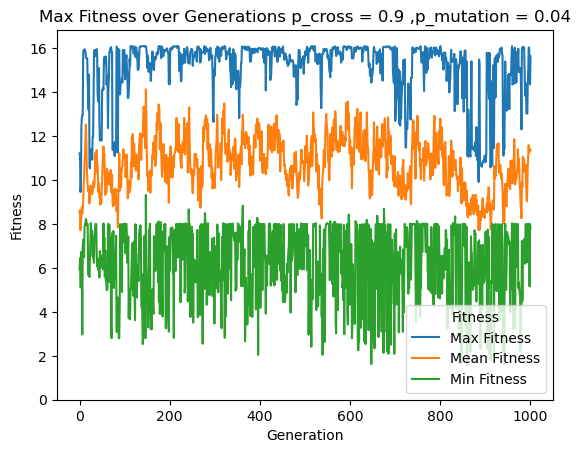

(-0.17647058823529438, 1.7058823529411766) 15.637143983059708


In [21]:
import matplotlib. pyplot as plt
plt.plot(maxs, label='Max Fitness')
plt.plot(means, label='Mean Fitness')
plt.plot(mins, label='Min Fitness')


plt.title("Max Fitness over Generations")
plt.suptitle("p_cross = 0.9 ,p_mutation = 0.04")
plt.xlabel('Generation')
plt.ylabel('Fitness')

plt.legend(title='Fitness', loc='best')


plt.ylim(bottom=0)


plt.show()

print(decode(best[-1]), f_coded(best[-1]))

In [22]:
p_cross = 1.0
p_mutation = 0.01

In [23]:
mins, maxs, means, best = perform_selection()
res = decode(best[-1])
res

(0.0588235294117645, 1.658823529411765)

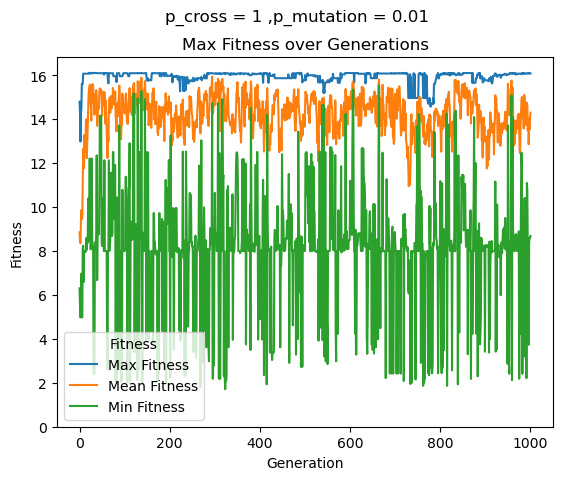

(0.0117647058823529, 1.5411764705882351) 16.075799992172065


In [25]:
plt.plot(maxs, label='Max Fitness')
plt.plot(means, label='Mean Fitness')
plt.plot(mins, label='Min Fitness')


plt.title("Max Fitness over Generations")
plt.suptitle("p_cross = 1 ,p_mutation = 0.01")
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend(title='Fitness', loc='best')
plt.ylim(bottom=0)


plt.show()

print(decode(best[-1]), f_coded(best[-1]))